In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
churn_df_org = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [0]:
churn_df = churn_df_org.copy()

In [4]:
churn_df.head()

customerID  gender  SeniorCitizen  ...  MonthlyCharges  TotalCharges Churn
0  7590-VHVEG  Female              0  ...           29.85         29.85    No
1  5575-GNVDE    Male              0  ...           56.95       1889.50    No
2  3668-QPYBK    Male              0  ...           53.85        108.15   Yes
3  7795-CFOCW    Male              0  ...           42.30       1840.75    No
4  9237-HQITU  Female              0  ...           70.70        151.65   Yes

[5 rows x 10 columns]

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7032 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [6]:
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Null Hypothesis: Their is no relationship between the two categorical variables

Alternate Hypothesis: Their exists a relationship between the two categories

In [7]:
churn_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

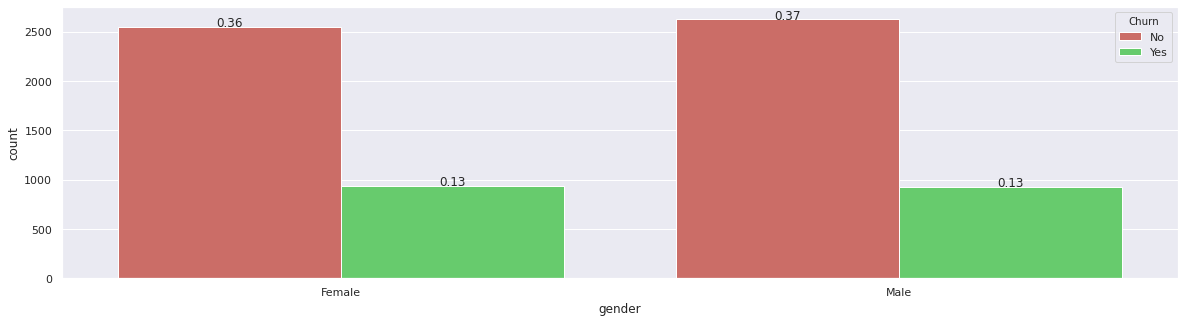

In [8]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x='gender', hue='Churn', data=churn_df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height + 3,
          '{:1.2f}'.format(height/churn_df.shape[0]), ha='center')

In [9]:
gender_churn_ct = pd.crosstab(index=churn_df['gender'], columns=churn_df['Churn'])
gender_churn_ct

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

In [10]:
gender_churn_ct.iloc[1].values

array([2625,  930])

In [0]:
(chi2, p, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

In [12]:
print("chi2: ", chi2)
print("p-value: ", p)
print("Degree of freedom: ",dof)

chi2:  0.4840828822091383
p-value:  0.48657873605618596
Degree of freedom:  1


As the p value is less than 0.5 then the gender category might not be significant for the churn.

In [18]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

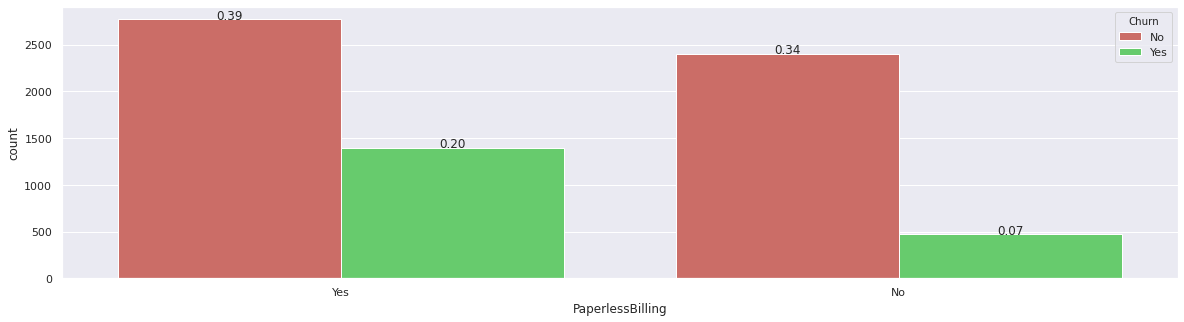

In [19]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=churn_df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height + 3,
          '{:1.2f}'.format(height/churn_df.shape[0]), ha='center')

In [0]:
billing_churn_ct = pd.crosstab(index = churn_df['PaperlessBilling'], 
                               columns=churn_df['Churn'])

In [22]:
billing_churn_ct

Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400

In [0]:
(chi2, p, dof, _) = stats.chi2_contingency([billing_churn_ct.iloc[0].values, 
                                            billing_churn_ct.iloc[1].values])

In [24]:
print("chi2: ", chi2)
print("p-value: ", p)
print("Degree of freedom: ",dof)

chi2:  258.27764906707307
p-value:  4.073354668665985e-58
Degree of freedom:  1


As the p value is nearly equal to zero so the PaperlessBilling can be considered significant.